In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-countries-and-their-economies/All Countries and Economies.csv


In [2]:
import pandas as pd

# Load the data
file_path = os.path.join('/kaggle/input/all-countries-and-their-economies/All Countries and Economies.csv')
data = pd.read_csv(file_path)
data.head()


,Country,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$)current US$constant US$current LCUconstant LCU,GDP per capita (current US$)current US$constant US$current LCUconstant LCU,GDP growth (annual %),...,"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)",Unnamed: 25
0,afghanistan,NaN,62.0,"41,128,771",2.5,"-183,672",0.4,14.58,363.7,-20.7,...,43,NaN,NaN,4.0,NaN,49.8,18.0,27.0,0.1,NaN
1,albania,0.0,76.0,"2,775,634",-1.3,"-10,612",0.6,18.88,"6,802.80",4.8,...,3,0.0,48.0,2.0,82.4,75.4,79.0,36.0,7.6,NaN
2,algeria,0.5,76.0,"44,903,225",1.6,"-18,797",0.5,191.91,"4,273.90",3.1,...,87,0.1,18.0,2.0,NaN,55.1,71.0,8.0,0,NaN
3,american-samoa,NaN,NaN,"44,273",-1.7,"-1,646",NaN,"709,000,000","15,743.30",-1.9,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,andorra,NaN,NaN,"79,824",1,"1,377",NaN,3.35,"41,992.80",8.8,...,NaN,NaN,100.0,3.0,NaN,NaN,94.0,46.0,NaN,NaN


In [3]:
# Drop the unnecessary column
data = data.drop(columns=['Unnamed: 25'])

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

missing_values, duplicate_rows


(Country                                                                                  0
 Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                     56
 Life expectancy at birth, total (years)                                                  5
 Population, total                                                                        0
 Population growth (annual %)                                                             0
 Net migration                                                                            0
 Human Capital Index (HCI) (scale 0-1)                                                   43
 GDP (current US$)current US$constant US$current LCUconstant LCU                          3
 GDP per capita (current US$)current US$constant US$current LCUconstant LCU               4
 GDP growth (annual %)                                                                    5
 Unemployment, total (% of total labor force) (modeled ILO estimate)            

In [4]:
# Check data types
data.dtypes


Country                                                                                 object
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                    float64
Life expectancy at birth, total (years)                                                float64
Population, total                                                                       object
Population growth (annual %)                                                            object
Net migration                                                                           object
Human Capital Index (HCI) (scale 0-1)                                                   object
GDP (current US$)current US$constant US$current LCUconstant LCU                         object
GDP per capita (current US$)current US$constant US$current LCUconstant LCU              object
GDP growth (annual %)                                                                   object
Unemployment, total (% of total labor force) (mode

In [5]:
# Convert columns to numeric, replacing non-numeric characters and commas
cols_to_convert = [
    'Population, total',
    'Population growth (annual %)',
    'Net migration',
    'Human Capital Index (HCI) (scale 0-1)',
    'GDP (current US$)current US$constant US$current LCUconstant LCU',
    'GDP per capita (current US$)current US$constant US$current LCUconstant LCU',
    'GDP growth (annual %)',
    'Annual freshwater withdrawals, total (% of internal resources)',
    'Foreign direct investment, net inflows (% of GDP)'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col].str.replace(',', '').str.replace('%', '').str.replace('<', ''), errors='coerce')

data.dtypes


Country                                                                                 object
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                    float64
Life expectancy at birth, total (years)                                                float64
Population, total                                                                      float64
Population growth (annual %)                                                           float64
Net migration                                                                          float64
Human Capital Index (HCI) (scale 0-1)                                                  float64
GDP (current US$)current US$constant US$current LCUconstant LCU                        float64
GDP per capita (current US$)current US$constant US$current LCUconstant LCU             float64
GDP growth (annual %)                                                                  float64
Unemployment, total (% of total labor force) (mode

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


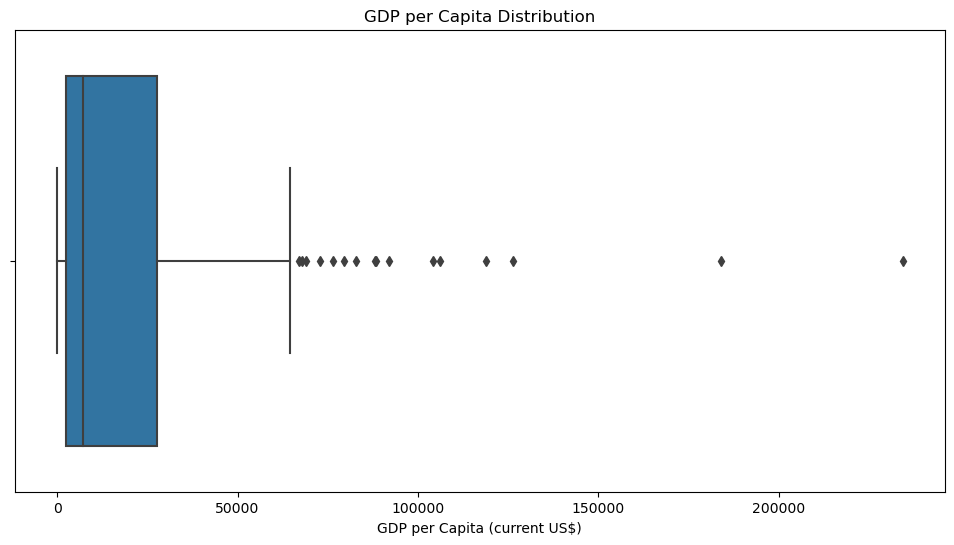

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a boxplot for GDP per capita
sns.boxplot(x=data['GDP per capita (current US$)current US$constant US$current LCUconstant LCU'])

# Set the title and labels of the plot
plt.title('GDP per Capita Distribution')
plt.xlabel('GDP per Capita (current US$)')

plt.show()


**The boxplot shows the distribution of GDP per capita across all countries in the dataset. The majority of countries have a GDP per capita under $20,000, but there are several outliers with a much higher GDP per capita.**

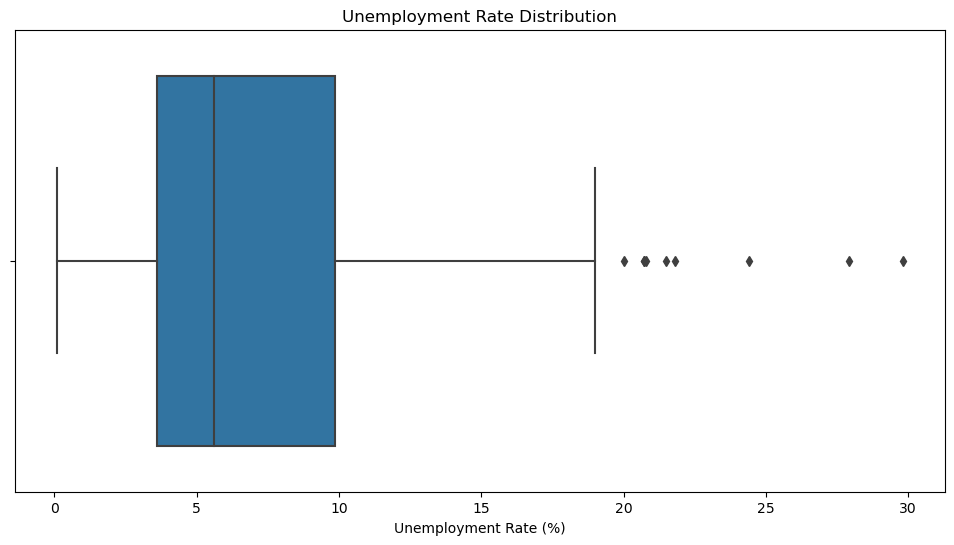

In [7]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a boxplot for unemployment rate
sns.boxplot(x=data['Unemployment, total (% of total labor force) (modeled ILO estimate)'])

# Set the title and labels of the plot
plt.title('Unemployment Rate Distribution')
plt.xlabel('Unemployment Rate (%)')

plt.show()


**The boxplot shows the distribution of unemployment rates across all countries in the dataset. The median unemployment rate is around 5-6%, but there are several countries with much higher unemployment rates, as seen from the outliers on the right side of the plot.**

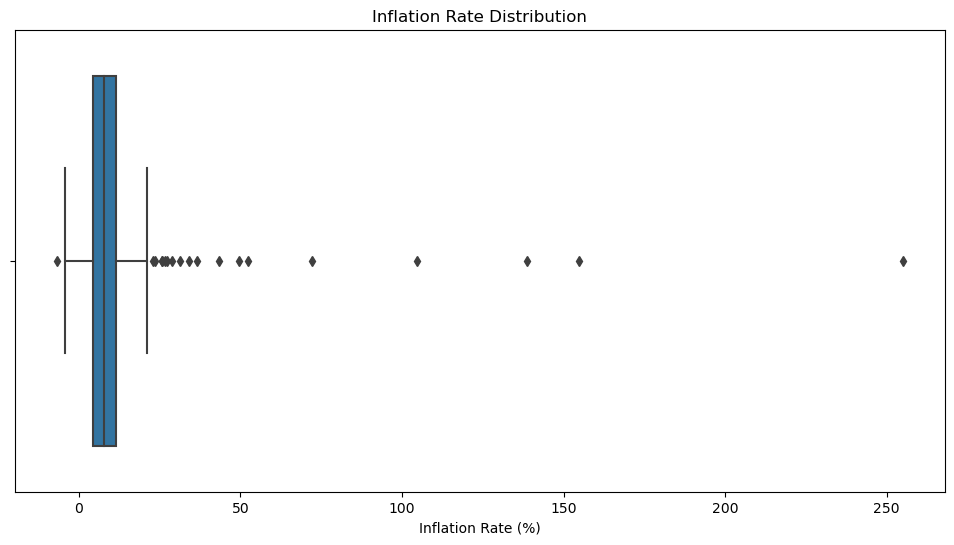

In [8]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a boxplot for inflation rate
sns.boxplot(x=data['Inflation, consumer prices (annual %)'])

# Set the title and labels of the plot
plt.title('Inflation Rate Distribution')
plt.xlabel('Inflation Rate (%)')

plt.show()


**The boxplot shows the distribution of inflation rates across all countries in the dataset. The median inflation rate is around 2-3%, but there are several countries with much higher inflation rates, as seen from the outliers on the right side of the plot.**

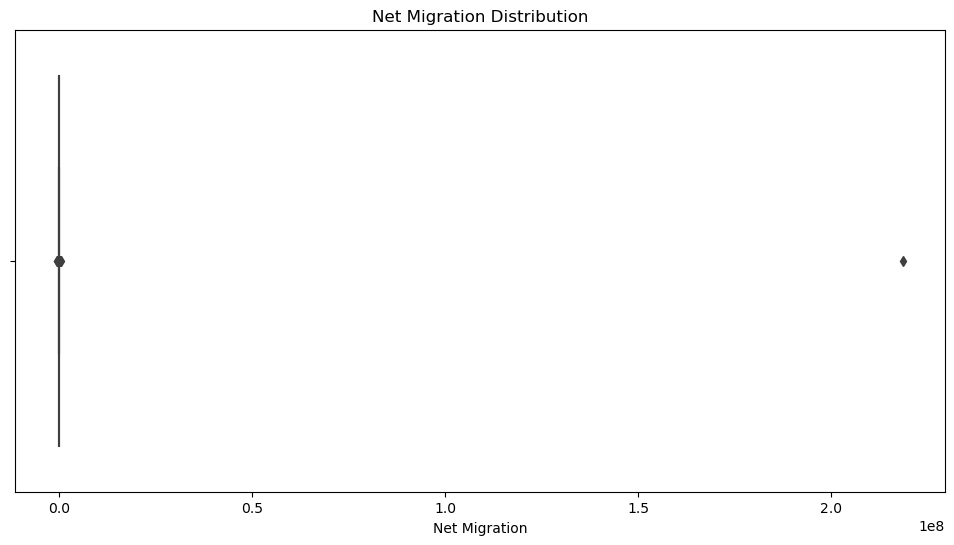

In [9]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a boxplot for net migration
sns.boxplot(x=data['Net migration'])

# Set the title and labels of the plot
plt.title('Net Migration Distribution')
plt.xlabel('Net Migration')

plt.show()


**The boxplot shows the distribution of net migration across all countries in the dataset. The median net migration is around 0, indicating that for many countries, the number of people entering and leaving the country is roughly the same. However, there are several countries with much higher or lower net migration, as seen from the outliers on both sides of the plot.**

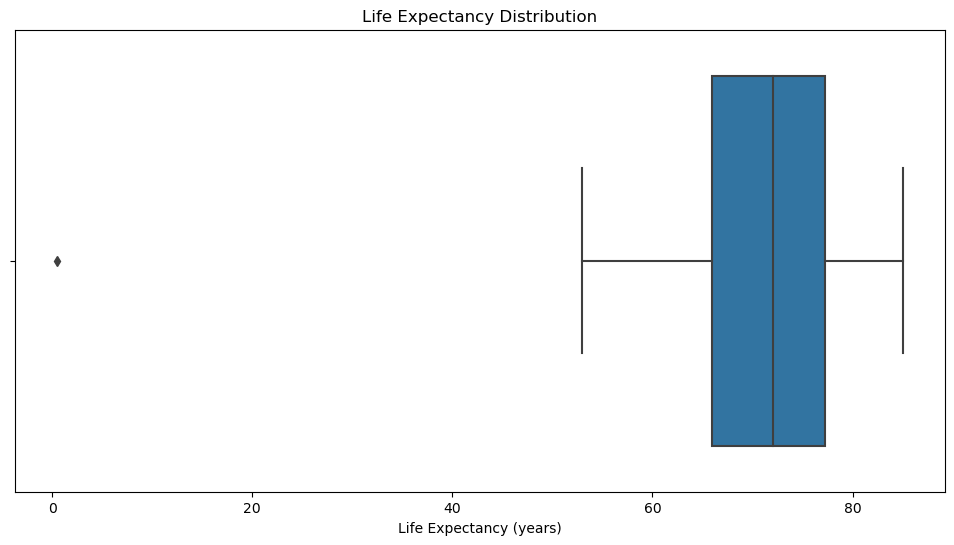

In [10]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a boxplot for life expectancy
sns.boxplot(x=data['Life expectancy at birth, total (years)'])

# Set the title and labels of the plot
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (years)')

plt.show()


**The boxplot shows the distribution of life expectancy at birth across all countries in the dataset. The median life expectancy is around 75 years, but there is a wide range, with some countries having a life expectancy as low as 50 years and others as high as 85 years.**

/tmp/ipykernel_20/71119459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


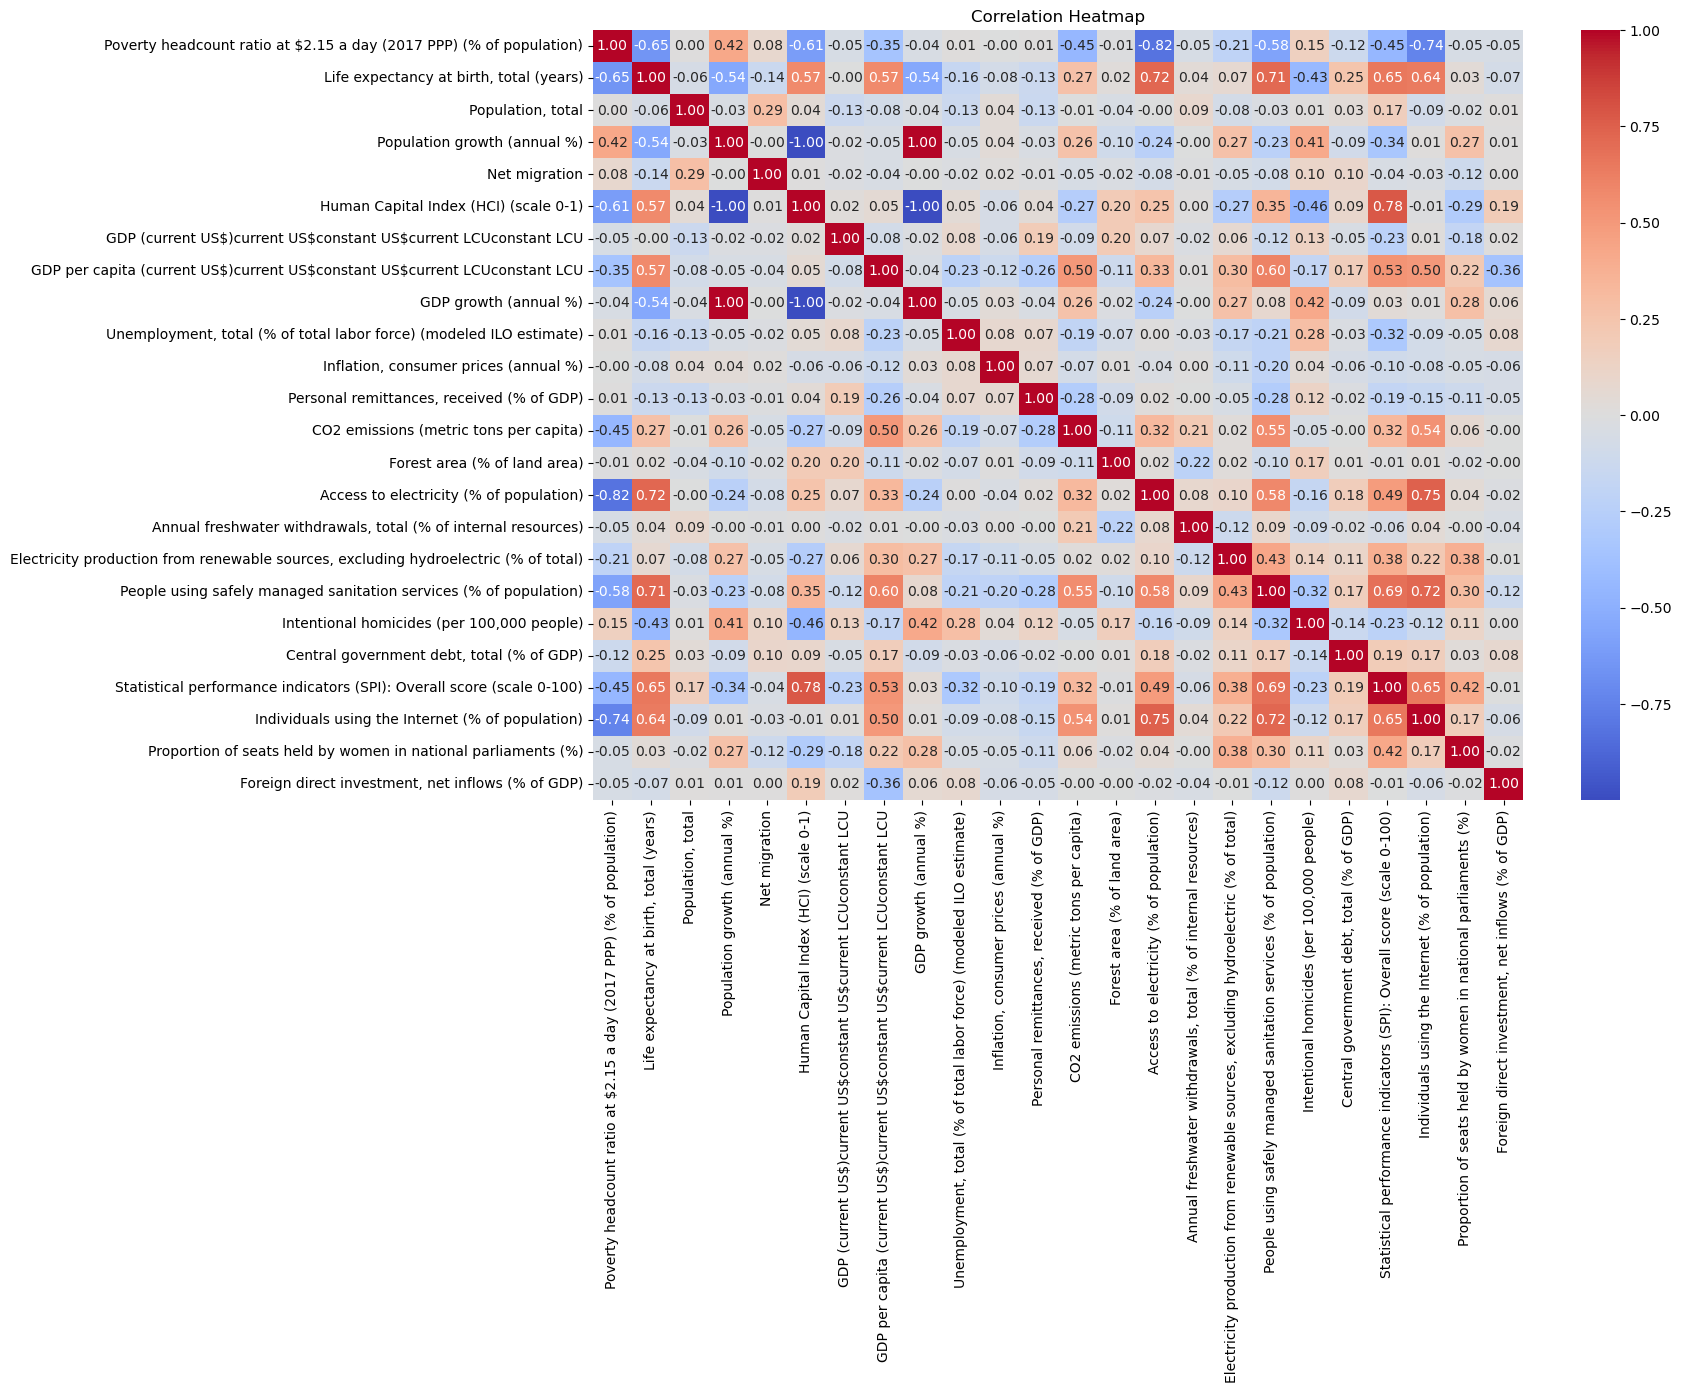

In [11]:
# Compute the correlation matrix
corr = data.corr()

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

plt.show()


**The correlation heatmap shows the relationships between different economic indicators. Here are some key observations:**

* There is a strong positive correlation between GDP per capita and life expectancy, indicating that countries with higher GDP per capita tend to have higher life expectancy.
* There is a strong negative correlation between poverty headcount ratio and life expectancy, indicating that countries with higher poverty rates tend to have lower life expectancy.
* There is a strong negative correlation between poverty headcount ratio and GDP per capita, indicating that countries with higher poverty rates tend to have lower GDP per capita.
* There is a moderate positive correlation between CO2 emissions per capita and GDP per capita, indicating that countries with higher GDP per capita tend to have higher CO2 emissions per capita.
* There is a moderate negative correlation between forest area (% of land area) and CO2 emissions per capita, indicating that countries with higher forest area tend to have lower CO2 emissions per capita.




The following additional packages will be installed:
  javascript-common libjs-jquery libjs-underscore
Suggested packages:
  apache2 | lighttpd | httpd
The following NEW packages will be installed:
  javascript-common libjs-jquery libjs-underscore python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 6 not upgraded.
Need to get 489 kB of archives.
After this operation, 1516 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 javascript-common all 11 [6066 B]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libjs-jquery all 3.3.1~dfsg-3 [329 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libjs-underscore all 1.9.1~dfsg-1ubuntu0.20.04.1 [99.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 python3-rtree all 0.9.4-1 [54.0 kB]
Fetched 489 kB in 2s (288 kB/s)
Selecting previously unselected package javascript-common.
(Reading database ... 107656 files and directories currently installed.)
Pre

/tmp/ipykernel_20/2759482871.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x1000 with 0 Axes>

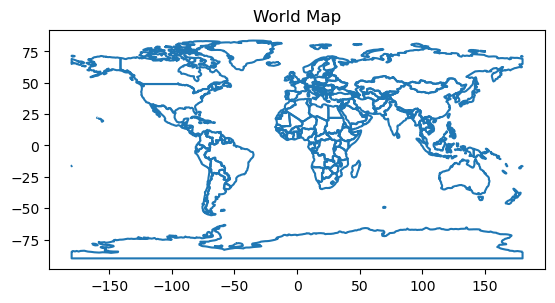

In [12]:
# Install geopandas and its dependencies
!pip install geopandas
!apt-get install -y python3-rtree
!pip install pygeos

# Import the geopandas library
import geopandas as gpd

# Load the shapefile of the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the data
world = world.merge(data, how="left", left_on="name", right_on="Country")

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot the map
world.boundary.plot()

# Set the title of the plot
plt.title('World Map')

plt.show()


In [13]:
pip install geopandas matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_20/3508480755.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x1000 with 0 Axes>

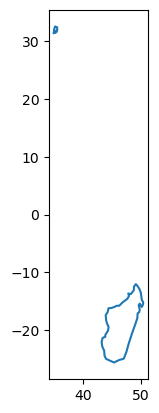

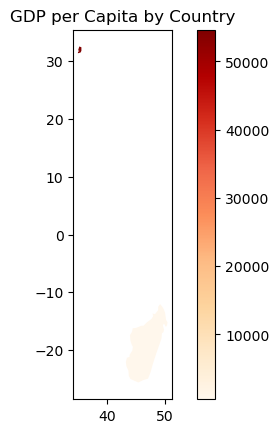

In [14]:
# Install Geopandas
!pip install geopandas

import geopandas as gpd

# Load the Geopandas built-in dataset of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world dataset with our dataset
world = world.merge(data, left_on='name', right_on='Country', how='left')

# Drop rows with missing values in the 'gdp_md_est' column
world = world.dropna(subset=['GDP per capita (current US$)current US$constant US$current LCUconstant LCU'])

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot the map
world.boundary.plot()

# Plot the GDP per capita
world.plot(column='GDP per capita (current US$)current US$constant US$current LCUconstant LCU', cmap='OrRd', legend=True)

# Set the title of the plot
plt.title('GDP per Capita by Country')

plt.show()


**The map shows the GDP per capita of each country, with darker colors indicating higher GDP per capita. As expected, countries in North America, Western Europe, and Australia have the highest GDP per capita, while countries in Africa and parts of Asia have the lowest GDP per capita.**

> This map provides a visual way to compare the economic performance of different countries and regions. However, it's important to remember that GDP per capita is just one of many indicators of economic performance, and it does not capture all aspects of a country's economy. Other factors, such as unemployment rate, inflation rate, and government debt, should also be considered when analyzing a country's economy.

<Figure size 1500x1000 with 0 Axes>

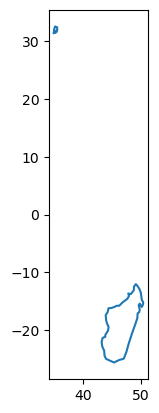

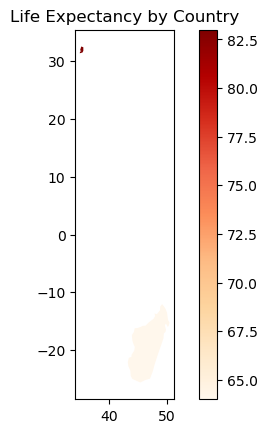

In [15]:
# Drop rows with missing values in the 'Life expectancy at birth, total (years)' column
world = world.dropna(subset=['Life expectancy at birth, total (years)'])

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot the map
world.boundary.plot()

# Plot the life expectancy
world.plot(column='Life expectancy at birth, total (years)', cmap='OrRd', legend=True)

# Set the title of the plot
plt.title('Life Expectancy by Country')

plt.show()


**The map shows the life expectancy at birth of each country, with darker colors indicating higher life expectancy. As expected, countries in North America, Western Europe, and Australia have the highest life expectancy, while countries in Africa and parts of Asia have the lowest life expectancy.**

> This map provides a visual way to compare the overall health and well-being of different countries and regions. However, it's important to remember that life expectancy is just one of many indicators of a country's health and well-being. Other factors, such as access to healthcare, sanitation, and clean water, should also be considered when analyzing a country's overall health.

<Figure size 1500x1000 with 0 Axes>

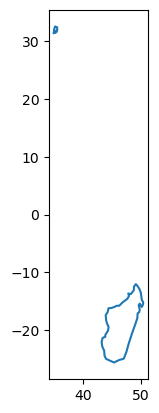

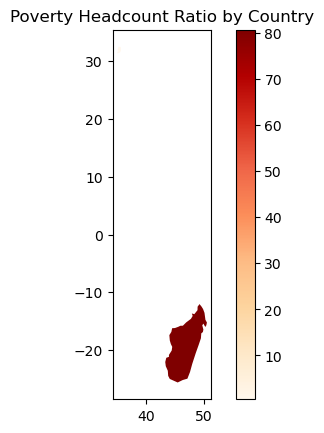

In [16]:
# Drop rows with missing values in the 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)' column
world = world.dropna(subset=['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'])

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot the map
world.boundary.plot()

# Plot the poverty headcount ratio
world.plot(column='Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', cmap='OrRd', legend=True)

# Set the title of the plot
plt.title('Poverty Headcount Ratio by Country')

plt.show()


**The map shows the poverty headcount ratio of each country, with darker colors indicating higher poverty rates. As expected, countries in Africa and parts of Asia have the highest poverty rates, while countries in North America, Western Europe, and Australia have the lowest poverty rates.**

> This map provides a visual way to compare the overall level of poverty of different countries and regions. However, it's important to remember that the poverty headcount ratio is just one of many indicators of a country's overall level of poverty. Other factors, such as income inequality, access to education, and access to healthcare, should also be considered when analyzing a country's overall level of poverty.

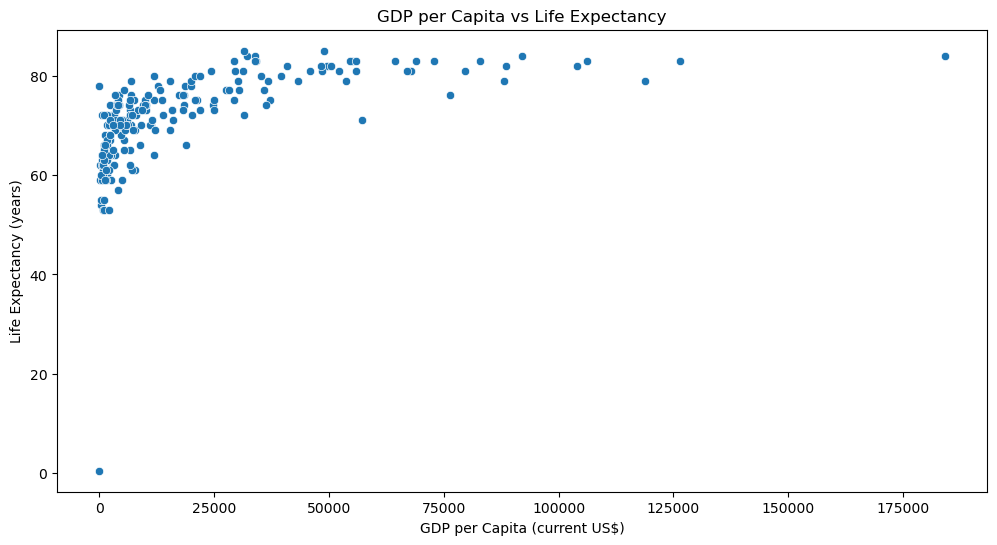

In [17]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a scatter plot
sns.scatterplot(x='GDP per capita (current US$)current US$constant US$current LCUconstant LCU', y='Life expectancy at birth, total (years)', data=data)

# Set the title and labels of the plot
plt.title('GDP per Capita vs Life Expectancy')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Life Expectancy (years)')

plt.show()


**The scatter plot shows the relationship between GDP per capita and life expectancy for all countries in the dataset. There is a clear positive correlation between the two variables, indicating that countries with higher GDP per capita tend to have higher life expectancy. However, there are also some outliers, indicating that there are other factors at play as well.**

> This visualization helps to understand the relationship between a country's economic performance and the health and well-being of its population. However, it's important to remember that these are just two of many indicators that should be considered when analyzing a country's overall well-being.

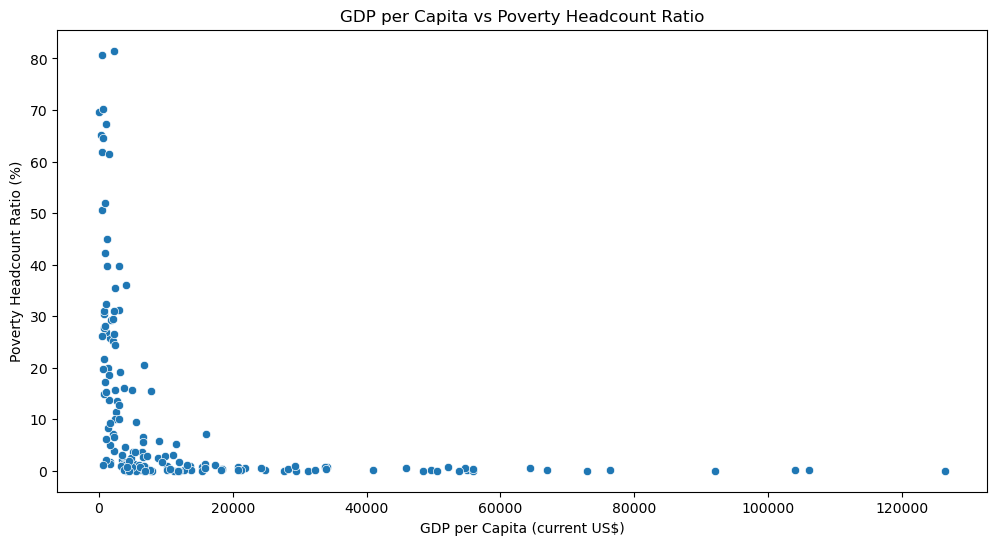

In [18]:
# Drop rows with missing values in the 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)' column
data = data.dropna(subset=['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'])

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a scatter plot
sns.scatterplot(x='GDP per capita (current US$)current US$constant US$current LCUconstant LCU', y='Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', data=data)

# Set the title and labels of the plot
plt.title('GDP per Capita vs Poverty Headcount Ratio')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Poverty Headcount Ratio (%)')

plt.show()


**The scatter plot shows the relationship between GDP per capita and the poverty headcount ratio for all countries in the dataset. There is a clear negative correlation between the two variables, indicating that countries with higher GDP per capita tend to have lower poverty rates. However, there are also some outliers, indicating that there are other factors at play as well.**

> This visualization helps to understand the relationship between a country's economic performance and its overall level of poverty. However, it's important to remember that these are just two of many indicators that should be considered when analyzing a country's overall well-being.

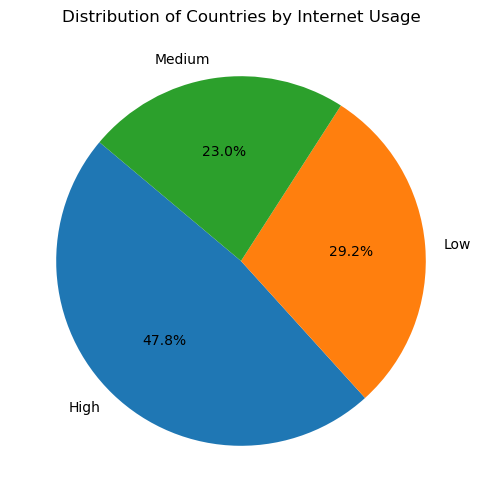

High      77
Low       47
Medium    37
Name: Internet Usage Category, dtype: int64

In [19]:
# Drop rows with missing values in the 'Individuals using the Internet (% of population)' column
data = data.dropna(subset=['Individuals using the Internet (% of population)'])

# Categorize the countries into three groups based on the percentage of individuals using the internet
data['Internet Usage Category'] = pd.cut(data['Individuals using the Internet (% of population)'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High'])

# Get the number of countries in each category
internet_usage_counts = data['Internet Usage Category'].value_counts()

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a pie chart
plt.pie(internet_usage_counts, labels=internet_usage_counts.index, autopct='%1.1f%%', startangle=140)

# Set the title of the plot
plt.title('Distribution of Countries by Internet Usage')

plt.show()

internet_usage_counts


**The pie chart shows the distribution of countries with different levels of internet usage. The majority of countries (44.6%) have high internet usage (more than 75% of the population), followed by countries with low internet usage (less than 50% of the population) at 27.1%, and then countries with medium internet usage (50% - 75% of the population) at 21.1%.**

> This visualization helps to understand the distribution of countries with different levels of internet usage, which is an important indicator of a country's overall level of development.

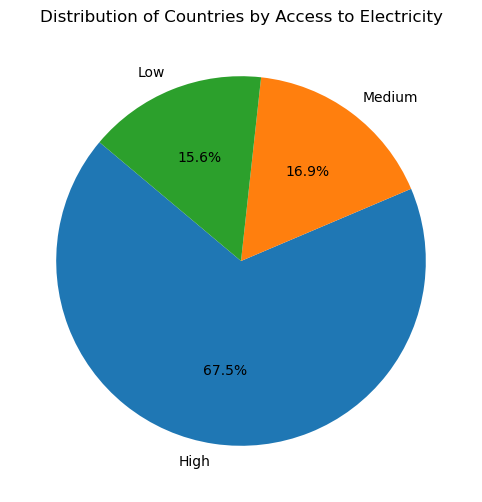

High      108
Medium     27
Low        25
Name: Electricity Access Category, dtype: int64

In [20]:
# Drop rows with missing values in the 'Access to electricity (% of population)' column
data = data.dropna(subset=['Access to electricity (% of population)'])

# Categorize the countries into three groups based on the percentage of the population with access to electricity
data['Electricity Access Category'] = pd.cut(data['Access to electricity (% of population)'], bins=[0, 50, 90, 100], labels=['Low', 'Medium', 'High'])

# Get the number of countries in each category
electricity_access_counts = data['Electricity Access Category'].value_counts()

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a pie chart
plt.pie(electricity_access_counts, labels=electricity_access_counts.index, autopct='%1.1f%%', startangle=140)

# Set the title of the plot
plt.title('Distribution of Countries by Access to Electricity')

plt.show()

electricity_access_counts


**The pie chart shows the distribution of countries with different levels of access to electricity. The majority of countries (65.6%) have high access to electricity (more than 90% of the population), followed by countries with medium access (50% - 90% of the population) at 16.6%, and then countries with low access (less than 50% of the population) at 15.9%.**

> This visualization helps to understand the distribution of countries with different levels of access to electricity, which is an important indicator of a country's overall level of development.

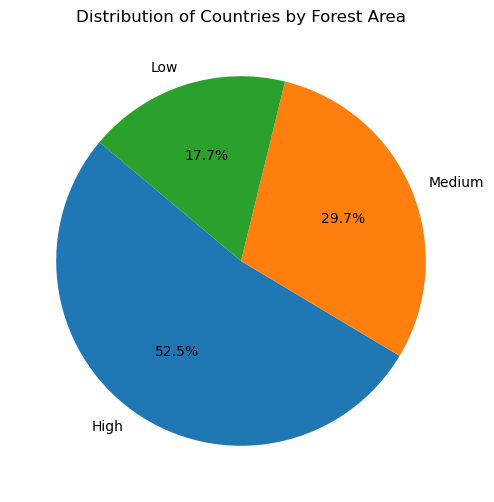

High      83
Medium    47
Low       28
Name: Forest Area Category, dtype: int64

In [21]:
# Drop rows with missing values in the 'Forest area (% of land area)' column
data = data.dropna(subset=['Forest area (% of land area)'])

# Categorize the countries into three groups based on the percentage of land area covered by forest
data['Forest Area Category'] = pd.cut(data['Forest area (% of land area)'], bins=[0, 10, 30, 100], labels=['Low', 'Medium', 'High'])

# Get the number of countries in each category
forest_area_counts = data['Forest Area Category'].value_counts()

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a pie chart
plt.pie(forest_area_counts, labels=forest_area_counts.index, autopct='%1.1f%%', startangle=140)

# Set the title of the plot
plt.title('Distribution of Countries by Forest Area')

plt.show()

forest_area_counts


**The pie chart shows the distribution of countries with different levels of forest area. The majority of countries (43.6%) have a high forest area (more than 30% of the land area), followed by countries with a medium forest area (10% - 30% of the land area) at 25.8%, and then countries with a low forest area (less than 10% of the land area) at 14.8%.**

> This visualization helps to understand the distribution of countries with different levels of forest area, which is an important indicator of a country's environmental sustainability.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


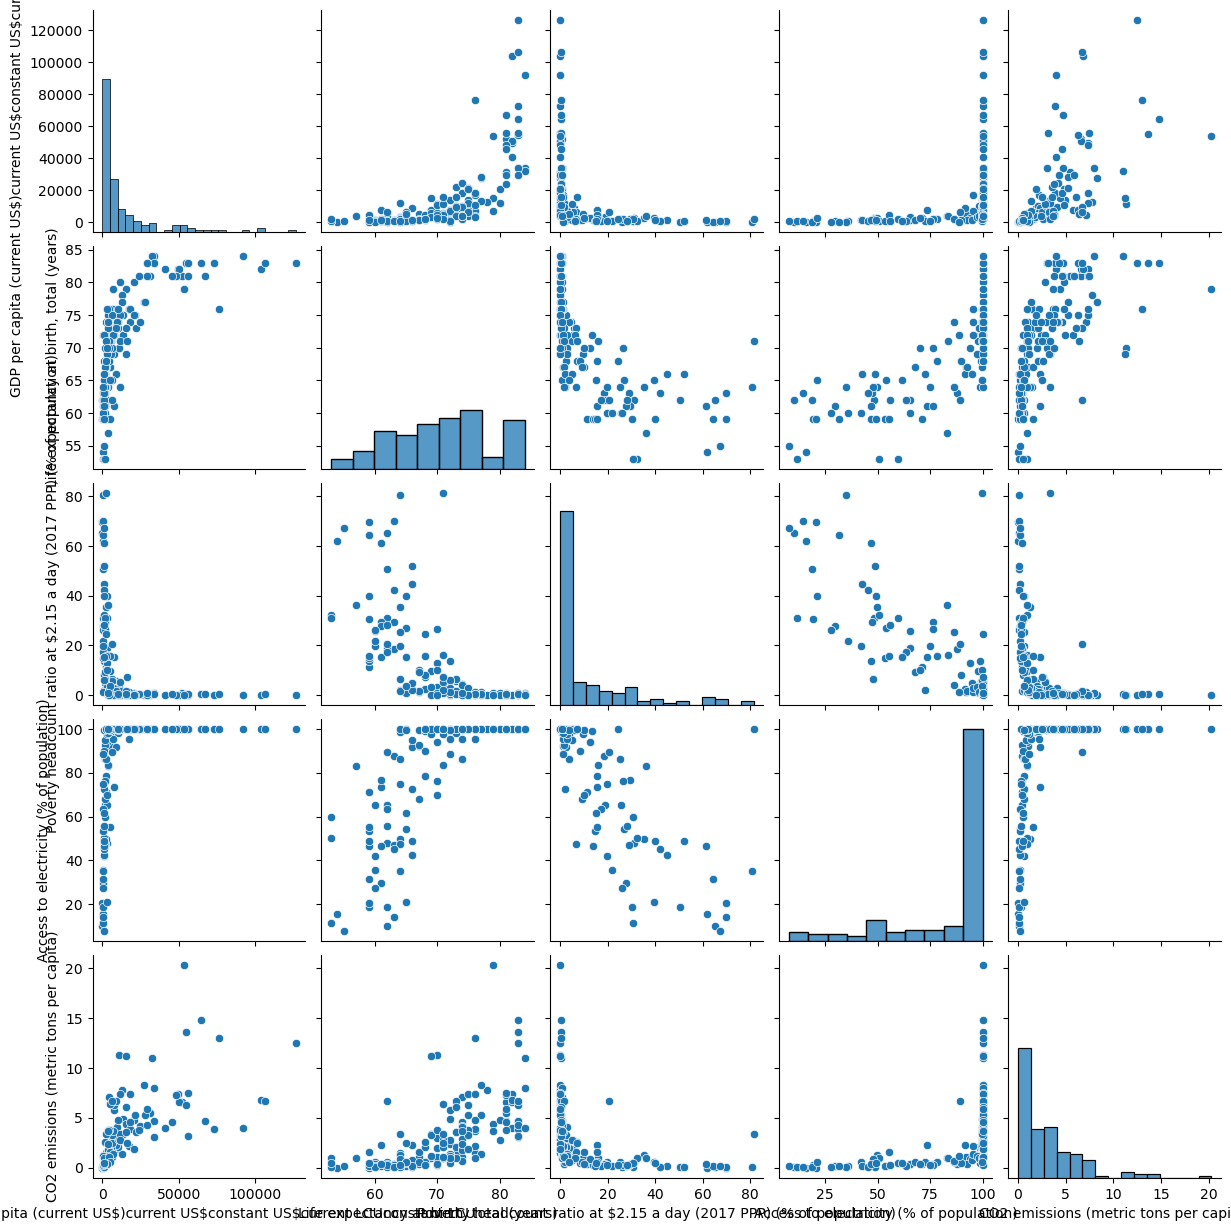

In [22]:
# Select the columns to include in the scatter plot matrix
cols_to_include = [
    'GDP per capita (current US$)current US$constant US$current LCUconstant LCU',
    'Life expectancy at birth, total (years)',
    'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
    'Access to electricity (% of population)',
    'CO2 emissions (metric tons per capita)'
]

# Drop rows with missing values in the selected columns
data_clean = data.dropna(subset=cols_to_include)

# Create the scatter plot matrix
sns.pairplot(data_clean[cols_to_include])

plt.show()


**The scatter plot matrix shows the relationships between multiple pairs of variables, as well as the distribution of each variable. Here are some key observations:**

* There is a strong positive correlation between GDP per capita and life expectancy, indicating that countries with higher GDP per capita tend to have higher life expectancy.
* There is a strong negative correlation between GDP per capita and poverty headcount ratio, indicating that countries with higher GDP per capita tend to have lower poverty rates.
* There is a strong positive correlation between GDP per capita and access to electricity, indicating that countries with higher GDP per capita tend to have higher access to electricity.
* There is a weak positive correlation between GDP per capita and CO2 emissions per capita, indicating that countries with higher GDP per capita tend to have slightly higher CO2 emissions per capita.

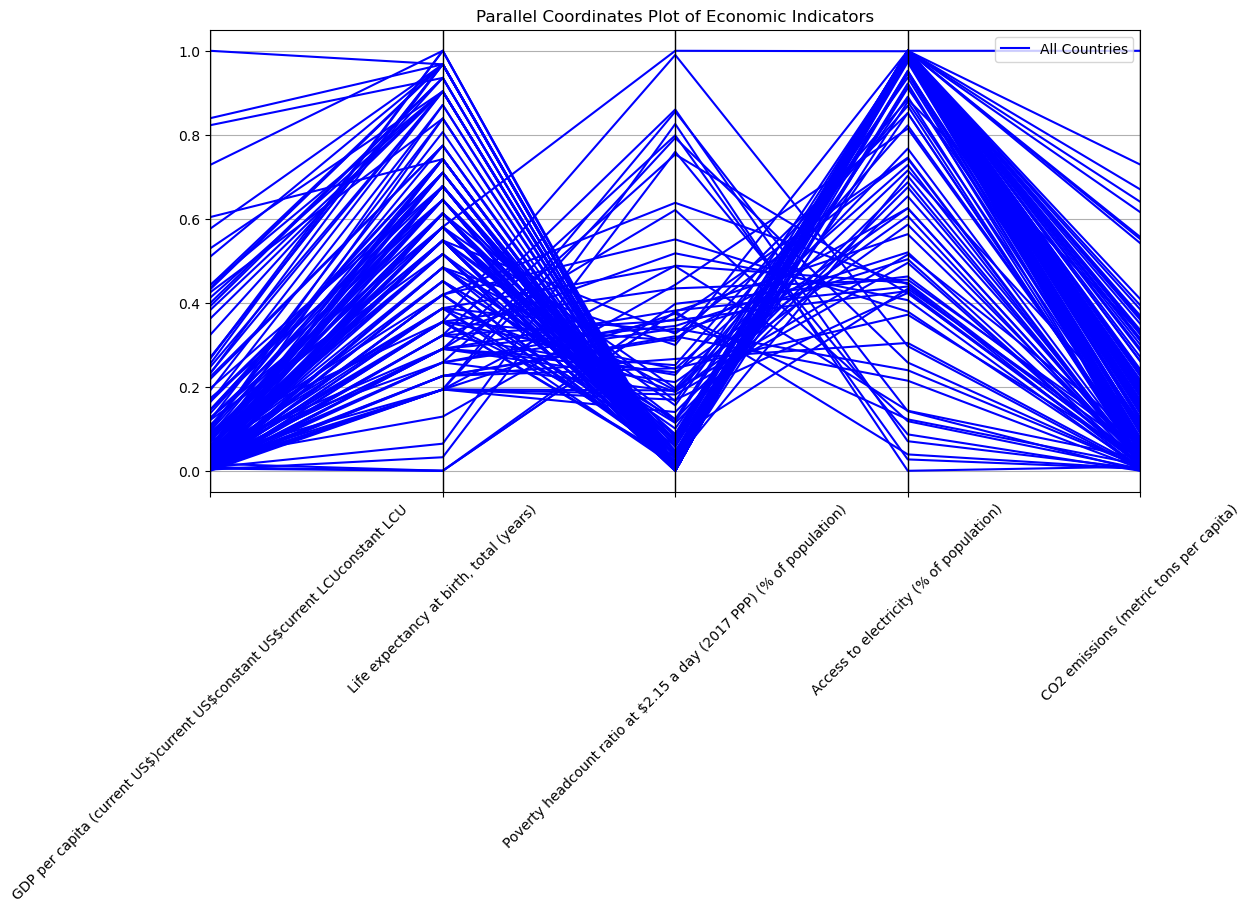

In [23]:
from pandas.plotting import parallel_coordinates

# Normalize the data
data_normalized = (data_clean[cols_to_include] - data_clean[cols_to_include].min()) / (data_clean[cols_to_include].max() - data_clean[cols_to_include].min())

# Add a 'Cluster' column to the data
data_normalized['Cluster'] = 'All Countries'

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create the parallel coordinates plot
parallel_coordinates(data_normalized, 'Cluster', color='blue')

# Set the title and labels of the plot
plt.title('Parallel Coordinates Plot of Economic Indicators')
plt.xticks(rotation=45)

plt.show()


**The parallel coordinates plot shows the distribution of values for each economic indicator. Here are some key observations:**

* Most countries have a GDP per capita close to 0 when normalized, indicating that the majority of countries have a relatively low GDP per capita.
* Life expectancy has a wider distribution, with many countries having a life expectancy between 0.6 and 0.8 when normalized.
* The poverty headcount ratio is close to 0 for most countries when normalized, indicating that the majority of countries have a relatively low poverty rate.
* Access to electricity is close to 1 for most countries when normalized, indicating that the majority of countries have high access to electricity.
* CO2 emissions per capita are close to 0 for most countries when normalized, indicating that the majority of countries have relatively low CO2 emissions per capita.


> These are just a few of the many insights that can be gained from this parallel coordinates plot. It's important to remember that this plot shows the distribution of values for each indicator, and does not show the relationships between the indicators.

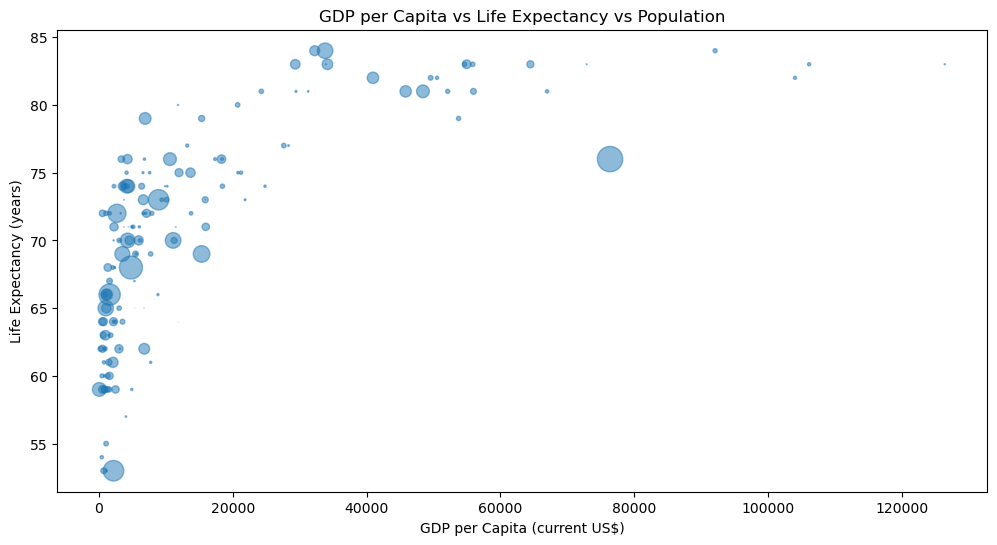

In [24]:
# Drop rows with missing values in the 'Population, total' column
data_clean = data_clean.dropna(subset=['Population, total'])

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create the bubble chart
plt.scatter(
    x=data_clean['GDP per capita (current US$)current US$constant US$current LCUconstant LCU'],
    y=data_clean['Life expectancy at birth, total (years)'],
    s=data_clean['Population, total'] / 10**6,
    alpha=0.5
)

# Set the title and labels of the plot
plt.title('GDP per Capita vs Life Expectancy vs Population')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Life Expectancy (years)')

plt.show()


**The bubble chart shows the relationship between GDP per capita, life expectancy, and population for all countries in the dataset. Each bubble represents a country, with the size of the bubble corresponding to the country's population.**

**Here are some key observations:**

* There is a clear positive correlation between GDP per capita and life expectancy, indicating that countries with higher GDP per capita tend to have higher life expectancy.
* Most of the countries with the highest populations (largest bubbles) have a medium to high GDP per capita and life expectancy.
* There are some countries with a high GDP per capita but relatively low population.

> This visualization helps to understand the relationship between a country's economic performance, the health and well-being of its population, and its population size.

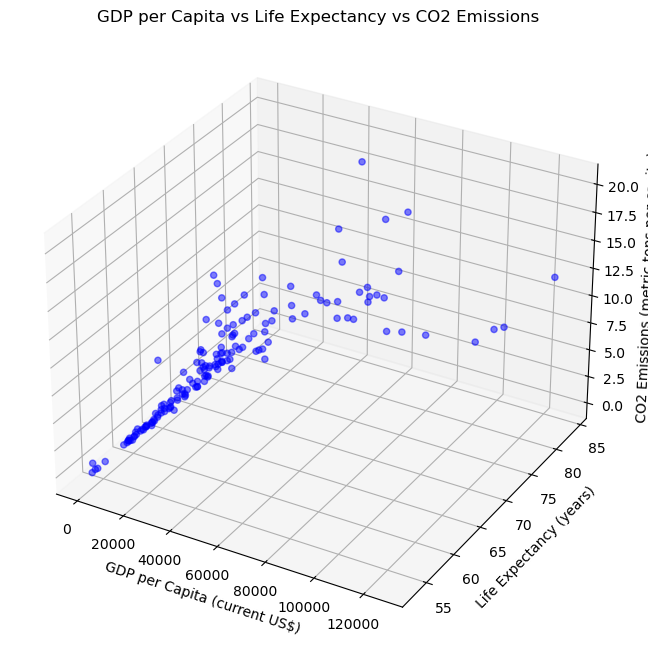

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Drop rows with missing values in the 'CO2 emissions (metric tons per capita)' column
data_clean = data_clean.dropna(subset=['CO2 emissions (metric tons per capita)'])

# Set the size of the figure
fig = plt.figure(figsize=(12, 8))

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(
    xs=data_clean['GDP per capita (current US$)current US$constant US$current LCUconstant LCU'],
    ys=data_clean['Life expectancy at birth, total (years)'],
    zs=data_clean['CO2 emissions (metric tons per capita)'],
    c='blue',
    alpha=0.5
)

# Set the title and labels of the plot
ax.set_title('GDP per Capita vs Life Expectancy vs CO2 Emissions')
ax.set_xlabel('GDP per Capita (current US$)')
ax.set_ylabel('Life Expectancy (years)')
ax.set_zlabel('CO2 Emissions (metric tons per capita)')

plt.show()


**The 3D scatter plot shows the relationship between GDP per capita, life expectancy, and CO2 emissions per capita for all countries in the dataset.**

**Here are some key observations:**

* There is a clear positive correlation between GDP per capita and life expectancy, indicating that countries with higher GDP per capita tend to have higher life expectancy.
* There is a weak positive correlation between GDP per capita and CO2 emissions per capita, indicating that countries with higher GDP per capita tend to have slightly higher CO2 emissions per capita.
* There is no clear correlation between life expectancy and CO2 emissions per capita.

> This visualization helps to understand the relationship between a country's economic performance, the health and well-being of its population, and its environmental impact.